# Part II - Effects of Mindset on Learning
## by Miyuki Maxwell

## Investigation Overview

In this investigation, I wanted to look at the different student attitudes towards learning and how this changed by country. 
> The goals of this presentation are to find the answers to :
>1. How does the mindset of the students in terms of learning change by gender?  
>2. How do the feelings about maths affect their scores?  
>3. How do attitudes towards learning change by country? 



## Dataset Overview and Executive Summary

>The dataset was PISA data which measures 15-year-olds’ ability to use their reading, mathematics and science knowledge and skills to meet real-life challenges. The data consisted of 612004 rows and 1119 columns. I created a subset dataset with 19 columns specific to the goals of this investigation. 

>1. **How does the mindset of the students in terms of learning change by gender?**  
 Most students agree that trying hard is important and they get satisfaction out of working hard. More males compared to females think that trying is not important and also don’t get satisfaction out of trying hard.  Out of the students that strongly agree with intelligence being something that you can’t change very much, more of them are male students, however, there are also more males who strongly disagree with intelligence being fixed. There are more females choosing the options agree and disagree. It seems that more males compared to females feel more strongly and choose extreme answers in this case and females choose less extreme answers(just agree/disagree; not strongly).
>2. **How do the feelings about maths affect their scores?**  
 The median math scores are quite similar with student feelings about math.The median maths score for the students that felt extremely challenged is slightly lower than the students who felt quite a bit challenged, a little challenged and not at all challenged. This could be explained by the fact that students who are extremely challenged might not understand the concepts and be negatively affected by the high level of maths in their lessons, whereas, students who are quite a bit challenged, may enjoy the challenge of maths and this may be the optimum challenge level for those students. There is a slight increase in math score as the students feel less nervous in maths which is expected. These students will have more confidence in maths and therefore get higher scores. Extremely motivated / inspired students, have a slightly lower median in their math score which was not expected. However, this data only shows their feelings about their last math lesson and this may not be their feelings about maths in general.   
>3. **How do attitudes towards learning change by country?**  
In China the students that strongly agree that *intelligence is something you can’t change* score higher in maths on average compared to the other students. This shows us a little about what common societal ideas are in China. In contrast, a student in New Zealand, Japan, Australia and the United Kingdom, will get a higher score if they disagree with the statement that intelligence is something you can't change much. In Dominican Republic, the students that chose ‘disagree’ scored highest in their maths tests. 
The students who agree with ‘trying hard at school is important’, generally get higher scores on average in all of the select countries. This is to be expected as students who try hard and think it’s important should get better scores. In general, the average math score for those who get satisfaction from trying hard is higher than those who don’t. This would be expected as the ones that don’t try hard will not get great results as they don’t enjoy trying hard.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
#read the in the dataset 
df = pd.read_spss('CY07_MSU_STU_QQQ.sav')

In [4]:
#creating a subset of the full dataset
subset_df = df.loc[:,['CNT','ST001D01T','ST004D01T' ,'ST097Q03TA','ST097Q05TA','ST100Q01TA', 'ST100Q03TA','ST211Q02HA','ST213Q04HA','ST181Q04HA','WB166Q02HA','WB166Q03HA','WB166Q04HA','ST184Q01HA','ST036Q08TA','ST182Q03HA','PV1MATH','PV1READ','PV1SCIE']]

In [5]:
#renaming the columns to more meaningful column names
subset_df.rename(columns={"CNT":"country","ST001D01T":"grade", "ST004D01T":"gender", "ST097Q03TA":"teacher_wait","ST097Q05TA":"lesson_wait","ST100Q01TA":"teacher_interest", "ST100Q03TA":"teacher_helps","ST211Q02HA":"teacher_listened","ST213Q04HA":"teacher_enjoys","ST181Q04HA":"try_competing","WB166Q02HA":"math_challenged", "WB166Q03HA":"math_nervous","WB166Q04HA":"math_inspired","ST184Q01HA":"intelligence_fixed","ST036Q08TA":"trying_important","ST182Q03HA":"hardwork_satisfaction","PV1MATH":"math_score","PV1READ":"reading_score", "PV1SCIE":"science_score"},inplace=True)

In [6]:
#convert the categorical variables in ordered categorical types
ordinal_var_dict = {
    ('teacher_wait','lesson_wait','teacher_interest','teacher_helps'):['Every lesson','Most lessons','Some lessons','Never or hardly ever'],
    ('teacher_listened','teacher_enjoys','try_competing','intelligence_fixed','trying_important','hardwork_satisfaction'):['Strongly agree','Agree', 'Disagree', 'Strongly disagree'],
    ('math_challenged','math_nervous','math_inspired'):['Extremely','Quite a bit', 'A little','Not at all']
}

for columns in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[columns])
    subset_df[list(columns)] = subset_df[list(columns)].astype(ordered_var)

## Feelings About Maths

> There are many students that don't feel very challenged or inspired in maths class. Most students are not at all nervous in maths class, however, there are actually some students (~5000 students) that feel extremely nervous in maths class. 


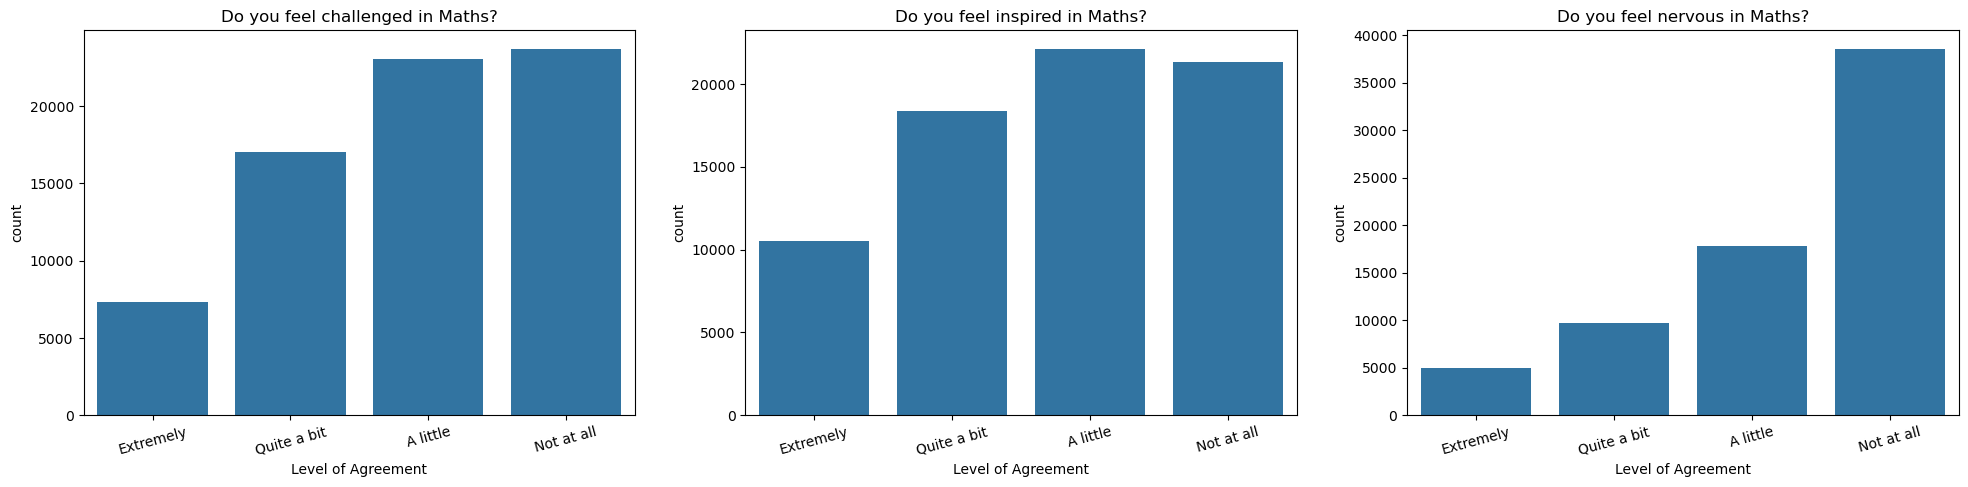

In [43]:
#observing feelings about maths using three countplots
plt.figure(figsize = [10, 5])

plt.subplot(1,3,1)
sns.countplot(data = subset_df, x = 'math_challenged', color = 'tab:blue')
plt.xticks(rotation=15)
plt.title('Do you feel challenged in Maths?')
plt.xlabel('Level of Agreement')

plt.subplot(1,3,2)
sns.countplot(data = subset_df, x = 'math_inspired', color = 'tab:blue')
plt.xticks(rotation=15)
plt.title('Do you feel inspired in Maths?');
plt.xlabel('Level of Agreement')

plt.subplot(1,3,3)
sns.countplot(data = subset_df, x = 'math_nervous', color = 'tab:blue')
plt.xticks(rotation=15)
plt.title('Do you feel nervous in Maths?');
plt.xlabel('Level of Agreement')

plt.subplots_adjust(right=2)

## Feelings About Maths and Math Score

> Median math scores are quite similar with students different feelings about math.The median maths score for the students that felt extremely challenged is slightly lower than the students who felt quite a bit challenged, a little challenged and not at all challenged. There is a slight increase in math score as the students feel less nervous in maths. Extremely motivated and inspired students have a slightly lower median in their math score which was not expected. However, this data only shows their feelings about their last math lesson and this may not be their feelings about maths in general.  

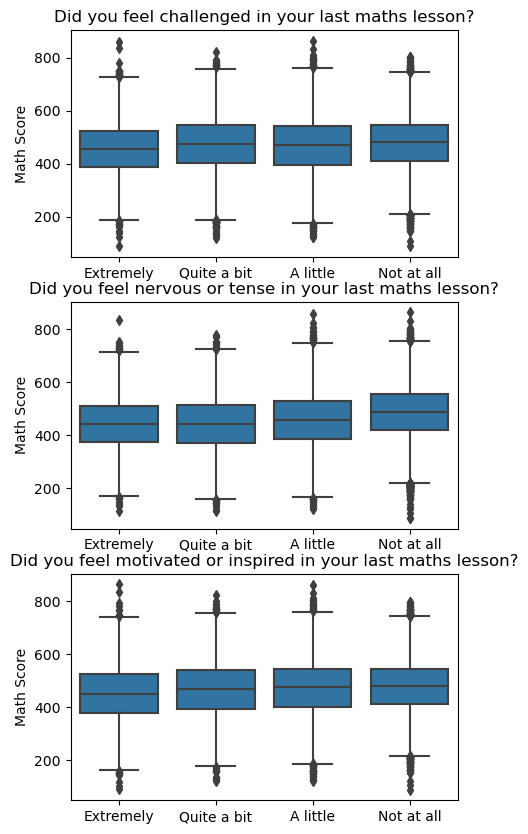

In [45]:
#create three boxplots in rows
fig, ax = plt.subplots(nrows=3, figsize = [5,10])

default_color = sns.color_palette()[0]
b1 = sns.boxplot(data=subset_df, x='math_challenged', y='math_score', color = default_color, ax = ax[0])
b1.title.set_text('Did you feel challenged in your last maths lesson?')
b2 = sns.boxplot(data=subset_df, x = 'math_nervous', y='math_score', color = default_color, ax = ax[1])
b2.title.set_text('Did you feel nervous or tense in your last maths lesson?')
b3 = sns.boxplot(data=subset_df, x = 'math_inspired', y='math_score', color = default_color, ax = ax[2])
b3.title.set_text('Did you feel motivated or inspired in your last maths lesson?')
for axis in ax:
    axis.set(xlabel=None)
    axis.set(ylabel='Math Score')
plt.show()


## Mindset About Learning and Gender

>We can see that out of the students that strongly agree with intelligence being something that you can’t change very much, more of them are male students, however, there are also more males who strongly disagree with intelligence being fixed. There are more females choosing the options agree and disagree.   
More males compared to females think that trying is not important. Although a lot of the students agree that it is important, out of the students that disagree, there are more males than females.   
In the last graph, we can see that many of the students agree that they find satisfaction in working as hard as they can. Of the students that disagree there are more males than females and vice versa for those who agree and strongly agree. 

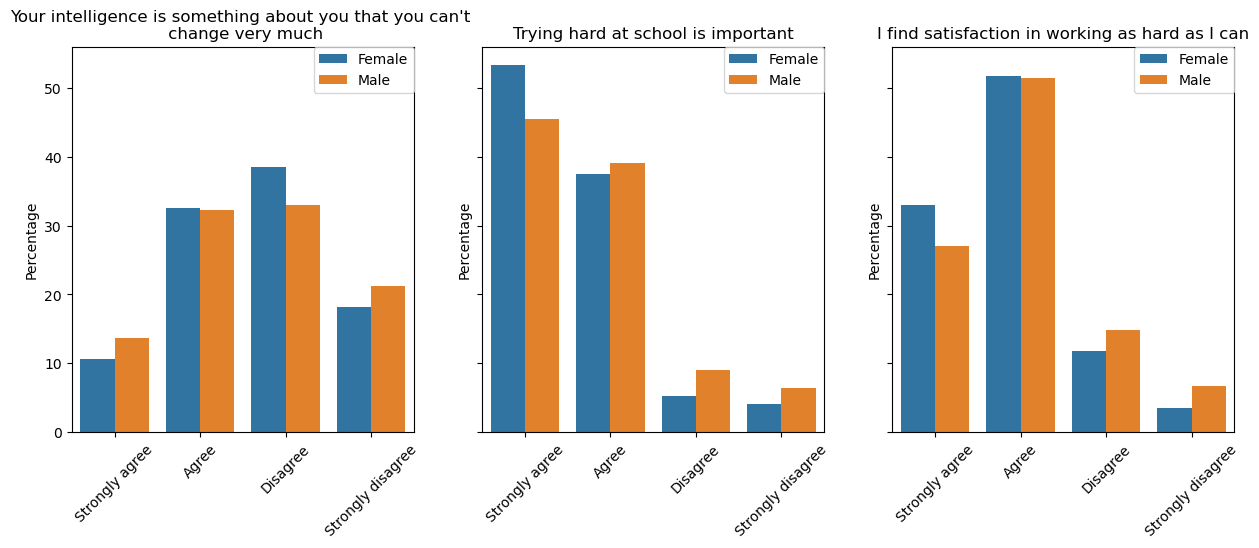

In [49]:
#make a function to normalise by gender
def normalising_by_gender(x):
    normalised_counts = subset_df.groupby([x, 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=0)
    normaldf = (normalised_counts * 100).reset_index()
    normaldf = normaldf.melt(id_vars=[x], var_name='gender', value_name='percentage').sort_values(x)
    plot = sns.barplot(data=normaldf, x=x, y='percentage', hue='gender')
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.xlabel(None)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplot(1,3,1)
normalising_by_gender('intelligence_fixed')
plt.title("Your intelligence is something about you that you can\'t \n change very much")

plt.subplot(1,3,2)
normalising_by_gender('trying_important')
plt.title('Trying hard at school is important')

plt.subplot(1,3,3)
normalising_by_gender('hardwork_satisfaction')
plt.title('I find satisfaction in working as hard as I can');

## The Level of Agreement to 'Intelligence is Something That Can't Change Very Much' By Country 

> Interestingly New Zealand, Australia and United Kingdom all have similar viewpoints about 40% students disagreeing with the statement that intelligence is something you can't really change. About 25% for these countries strongly disagree and 25% agree. Less than 10% strongly agree. Japan students have similar views but there are about 50% that disagree (about 10% more than NZ, Oz and UK) and a few less that strongly disagree. 
A few more students in China have a fixed mindset where they agree that intelligence is something you can't change very much with around 35% agreeing. However, around 35% also disagree.
In Dominican Republic, around 65% either agree or strongly agree. This is an interesting contrast to the other countries.


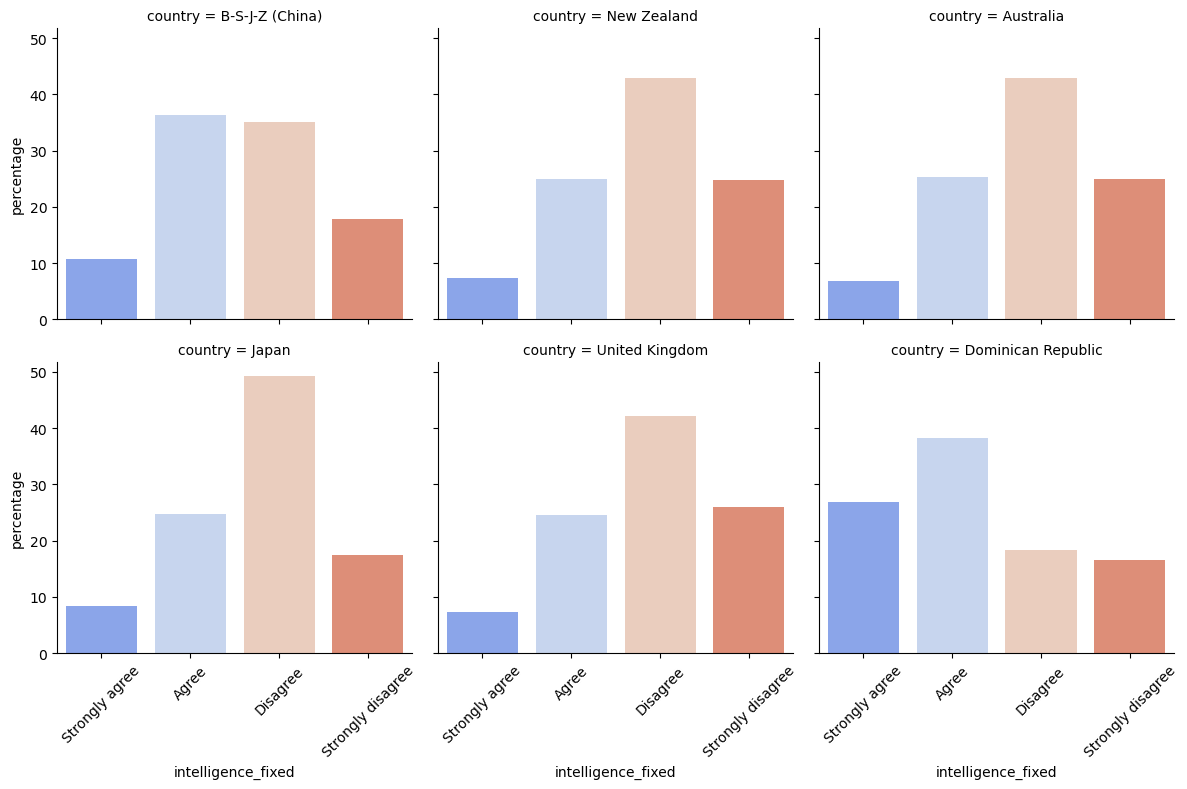

In [53]:
#looking at the percentages of each viewpoint for each country on whether intellogence is fixed or not
normalised_intelligence = select_country_df.groupby(by=['country','intelligence_fixed']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
normal_df = (normalised_intelligence * 100).reset_index()
country_intellig_melt = normal_df.melt(id_vars=['country'],var_name='intelligence_fixed', value_name='percentage').sort_values('country')


# Convert 'intelligence_fixed' column to categorical type with the specified order
intelligence_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
country_intellig_melt['intelligence_fixed'] = pd.Categorical(country_intellig_melt['intelligence_fixed'], categories=intelligence_order, ordered=True)
country_intellig_melt.sort_values(['country', 'intelligence_fixed'], inplace=True)


#creating barplots for each country and whether they think intelligence is fixed or able to be changed
g = sns.FacetGrid(data=country_intellig_melt, col='country', col_wrap=3, height=4)

# Rotate labels function
def rotate_labels(*args, **kwargs):
    plt.xticks(rotation=45)

# Use the order parameter in barplot to set the category order explicitly
g.map(sns.barplot, 'intelligence_fixed', 'percentage', order=intelligence_order, palette='coolwarm')
g.map(rotate_labels)

plt.show()

## Test Scores By Country and Subject

>New Zealand, Australia, United Kingdom and Dominican Republic all have lower median maths scores compared to science and reading. Whereas in the Asian countries, the Science and Maths scores are visibly higher than the reading score. 

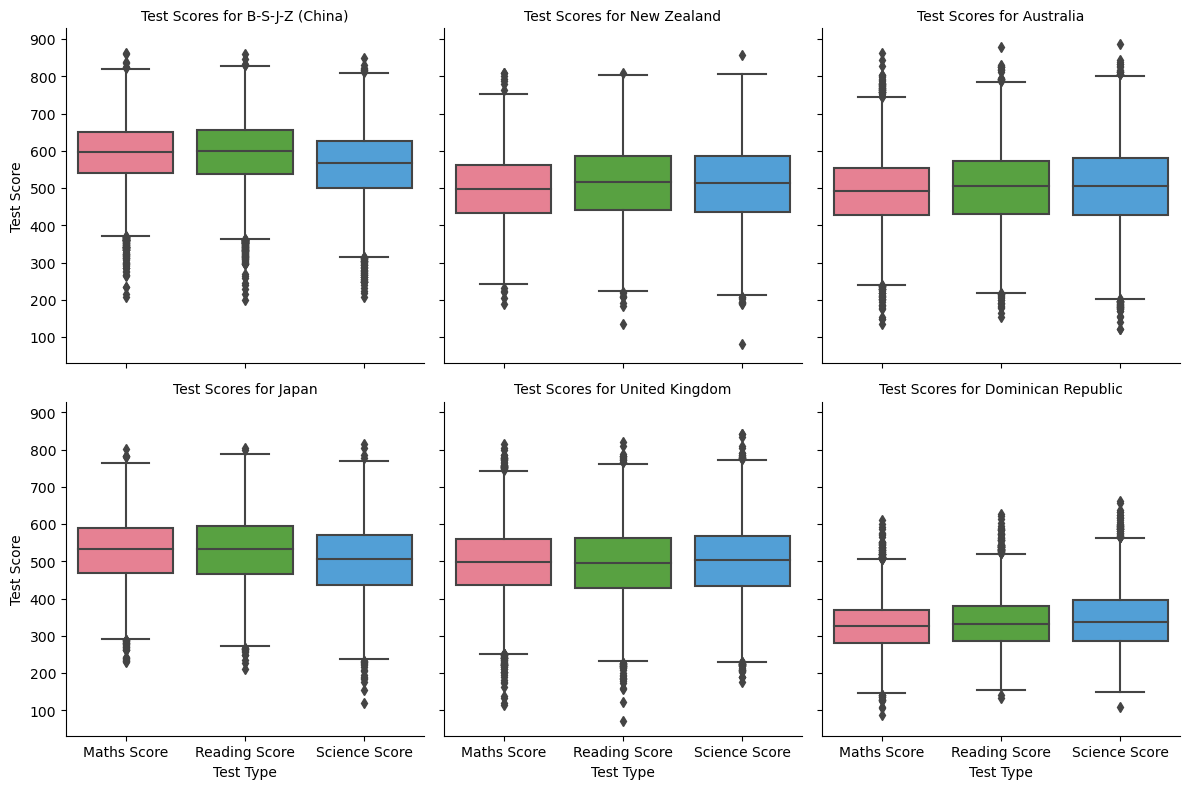

In [51]:
#make a facet grid of specific countries of interest and their maths scores
select_country = ['B-S-J-Z (China)', 'New Zealand', 'Australia', 'Japan', 'United Kingdom', 'Dominican Republic']
select_country_df = subset_df[subset_df['country'].isin(select_country)]
select_country_df['country'] = pd.Categorical(select_country_df['country'], categories=select_country, ordered=True)
subset_select_country_df = select_country_df[['country','math_score','science_score','reading_score']]
select_country_melt = subset_select_country_df.melt(id_vars=['country'],var_name='test_type', value_name='test_score')
g = sns.FacetGrid(data=select_country_melt, col='country', col_wrap=3, height=4)
g.map(sns.boxplot, 'test_type', 'test_score', palette='husl')
g.set_titles('Test Scores for {col_name}')
g.set_ylabels('Test Score')
g.set_xlabels('Test Type')
g.set_xticklabels({'Maths Score', 'Science Score', 'Reading Score'})
# Show the plot
plt.show()

## Average Maths Scores By Country and Level of Agreement to 'Intelligence is Something That Can't Change Very Much'

>In China, the students who strongly agree with 'intelligence is something that you can’t change very much' have higher scores than those who strongly disagree. Those from Japan, United Kingdom, New Zealand, Australia and Dominican Republic who strongly agree with the statement get lower on average scores compared to those who think that intelligence is something you can change. 

>In general the average the math score for those who get satisfaction from trying hard is higher than those who don’t. This would be expected as the ones that don’t try hard will not get great results as they don’t enjoy trying hard. 

>Students who agree with ‘trying hard at school is important’, generally get higher scores on average in all of the select countries. Interstingly in the UK, the students who strongly disagree that trying is important, have a similar average to those who agree that trying is important. There is a similar shape with China, Australia and Dominican Republic, where the average math scores go down from strongly agree, agree, and disagree, then the average score increases slightly from the previous 'disagree' option. 
In New Zealand and Japan, the results of the maths tests and their opinions on whether trying is important is what I would have expected of all of the countries as the more important they think trying is, the better the the average score. 

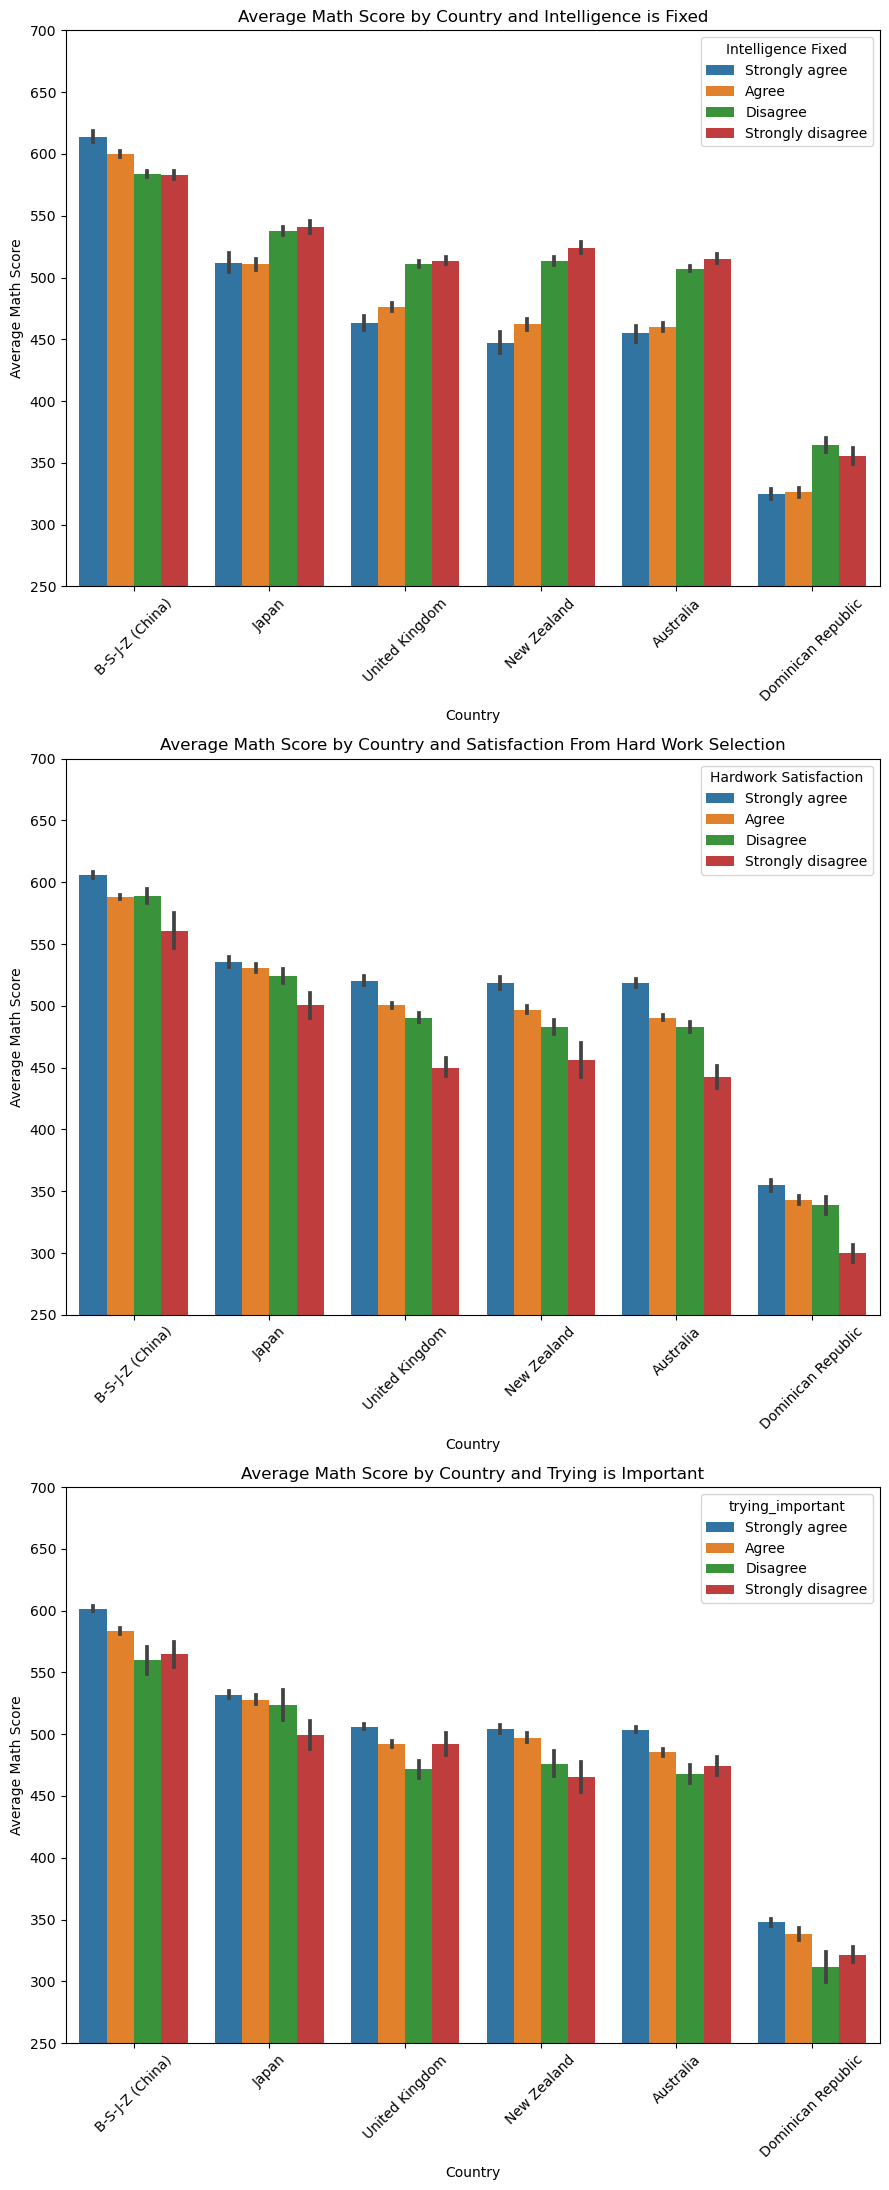

In [52]:
# Create a bar plot for average math scores grouped by 'country' and 'intelligence_fixed', 
#'hardwork_satisfaction' and 'trying_important'
avg_math_score = select_country_df.groupby(['country', 'intelligence_fixed'])['math_score'].mean().reset_index()
ordered_countries = avg_math_score.groupby('country')['math_score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(9, 22))
plt.subplot(3,1,1)
ax1 = sns.barplot(data=select_country_df, x='country', y='math_score', hue='intelligence_fixed', order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='Intelligence Fixed')
plt.title('Average Math Score by Country and Intelligence is Fixed')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax1.set_ylim(250,700)

plt.subplot(3,1,2)
ax2 = sns.barplot(data=select_country_df, x='country', y='math_score', hue='hardwork_satisfaction', order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='Hardwork Satisfaction')
plt.title('Average Math Score by Country and Satisfaction From Hard Work Selection')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax2.set_ylim(250,700)

plt.subplot(3,1,3)
ax3 =sns.barplot(data=select_country_df, x='country', y='math_score', hue='trying_important',  order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='trying_important')
plt.title('Average Math Score by Country and Trying is Important')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax3.set_ylim(250,700)

plt.tight_layout()
plt.show()